<h1><center> **Information Retrieval in High-Dimensional Data** </center></h1>
<h1><center> Assignment 2: Principal Component Analysis </center></h1>

<h3 align="center">*Felix Buchert, Daniela Geisinger, Johann Jahner, Alexander Ladwein, Beike Lu, Alexander Schwer - (G14)*</h3> 
<br>

# Task 1

### 1.1

- $ s^T \Sigma \Sigma^T s = \sum\limits_{i=1}^p s_i^2 \sigma_{i,i}^2 \leq \sum\limits_{i=1}^p s_i^2 \sigma_{1,1}^2 = \sigma_{1,1}^2 \sum\limits_{i=1}^p s_i^2 = \sigma_{1,1}^2 $

The left side of the inequality can be viewed as expectation over the r.v. $\sigma_{i,i}^2$ and a expectation is always lower  or equal  to the maximum value the r.v. can take on. Therefore the left side is the lowest achieveable upper bound. Since this upper bound can be achieved by setting $s = e_1$,  the maximum is given by $\sigma_{1,1}^2$.
### 1.2
- $a = \sum\limits_{i=1}^p \alpha_i u_i=U\alpha  $          
- $    \alpha=[\alpha_1,...,\alpha_p], \lVert \mathbf{\alpha} \rVert=1$

This expression does not affect the norm constraint, since 

$\lVert \mathbf{a} \rVert = \sqrt{(U\alpha)^T(U\alpha)}= \sqrt{\alpha^TU^TU\alpha}=\lVert \mathbf{\alpha} \rVert=1  $

With this, the empirical variance can be rewritten in the following way: 

$ \frac{1}{N} a^TXX^Ta = \frac{1}{N} a^T U \Sigma V^T V \Sigma^T U^T a = \frac{1}{N} a^T U \Sigma\Sigma^T U^T a = \frac{1}{N} \alpha^TU^T U \Sigma\Sigma^T U^T U\alpha =\frac{1}{N} \alpha^T \Sigma\Sigma^T \alpha$

This leaves us with the same problem as in subtask 1. This means: 
$\alpha = e_1 \Leftrightarrow a=Ue_1=u_1$ 





# Load Data

In [26]:
import numpy as np
import scipy.misc 
import matplotlib.pyplot as plt
import os
from parse import *


##load the training set images and labels--------------------

path='yaleBfaces/subset0/'
filelist=os.listdir(path)

T=np.zeros((2500,len(filelist)))
L_T=np.zeros(len(filelist))
i=0
for filename in filelist:
    T[:,i]=np.squeeze(scipy.misc.imread(path+filename).reshape(-1,1))
    parsed=parse("person{}_{}.png",filename)
    L_T[i]=parsed[0]
    i=i+1

T=T-np.mean(T,1,keepdims=True)
L_T=L_T.astype(np.int32)
##load the training set images and labels-------------------end


##load the test set images and labels--------------------

path1="yaleBfaces/subset1/"
path2="yaleBfaces/subset2/"
path3="yaleBfaces/subset3/"
path4="yaleBfaces/subset4/"
pathes=[path1,path2,path3,path4]

L_S_list=[[],[],[],[]]
S_list=[[],[],[],[]]
k=0
for path in pathes:
    filelist= os.listdir(path)
    S=np.zeros((2500,len(filelist)))
    L_S=np.zeros(len(filelist))
    i=0 
    for filename in filelist:    
        S[:,i]=np.squeeze(scipy.misc.imread(path+filename).reshape(-1,1))
        parsed=parse("person{}_{}.png",filename)
        L_S[i]=parsed[0];
        i=i+1    
    S=S-np.mean(S,1,keepdims=True)
    L_S=L_S.astype(np.int32)
    
    S_list[k]=S
    L_S_list[k]=L_S
    k=k+1

##load the test set images and labels-------------------end


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


# Task 2.1

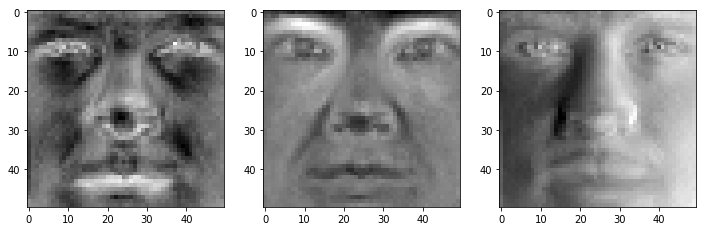

In [27]:
def svdVec(T,k):
    U,S,V = np.linalg.svd(T,full_matrices=True)
    return U[:,0:k]

U=svdVec(T,20)

fig=plt.figure(figsize=(12, 12))
columns = 3
rows = 1
for i in range(0, columns*rows):   
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(U[:,i].reshape(50,50),cmap='gray')
plt.show()

# Task 2.2

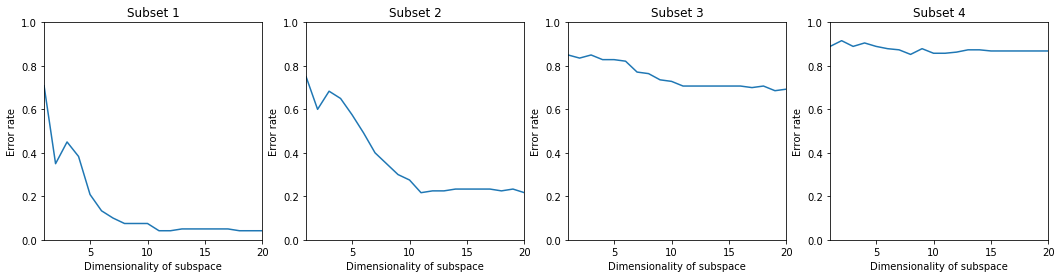

In [48]:
def classifyAndEvaluate(T,L_T,S,L_S,U,k):
    N,p = S.shape
    N,q = T.shape  
    U=U[:,0:k]
    C_=np.zeros(p,dtype=np.int32) 
    S_red=np.dot(U.T,S)
    T_red=np.dot(U.T,T)
    for n in range(0,p):             
        dist=np.array([np.linalg.norm(t-S_red[:,n]) for t in T_red.T ])
        nearest_idx=dist.argsort()[:3]          
        nearest_label=L_T[nearest_idx]  
        COUNT=np.bincount(nearest_label)        
        C_[n]=np.argmax(COUNT)  
        
     
    return np.sum(C_!=L_S).astype(np.float)/float(p)     #return error rate    
    

fig=plt.figure(figsize=(18, 4))            

for i in range(0,4):
    rates= []
    k_list = []
    for k in range(1,20+1):  
        rate=classifyAndEvaluate(T,L_T,S_list[i],L_S_list[i],U,k)        
        rates.append(rate)
        k_list.append(k)

    fig.add_subplot(1, 4, i+1)
    plt.axis([1, k, 0, 1])
    plt.title('Subset {}'.format(i+1))
    plt.ylabel('Error rate')
    plt.xlabel('Dimensionality of subspace')
    plt.plot(k_list,rates)
plt.show()

# Task 2.3

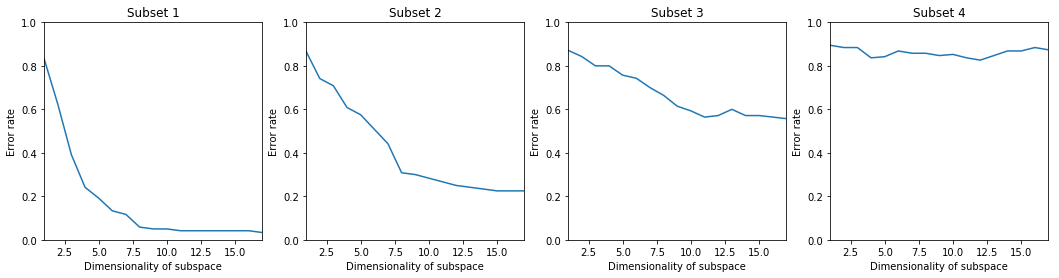

In [52]:
#2.3 ---just copy 2.2 but without the first 3 colums of U and range 1:17
fig=plt.figure(figsize=(18, 4))   
for i in range(0,4):
    rates=[]
    k_list = []
    
    for k in range(1,17+1):  
        rates.append(classifyAndEvaluate(T,L_T,S_list[i],L_S_list[i],U[:,3:],k))    
        k_list.append(k)

    fig.add_subplot(1, 4, i+1)
    plt.axis([1, k, 0, 1])
    plt.title('Subset {}'.format(i+1))
    plt.ylabel('Error rate')
    plt.xlabel('Dimensionality of subspace')
    plt.plot(k_list,rates)

plt.show()

The differences between the results from 2.2 and 2.3 arise from the fact that the first (three) principal components represent the directions of highest variation in the data, i.e. the axis along which the pictures can be distinguished best. Neglecting these (most) important features of the data has considerable effect on recognition rate. Moreover, principal components of one subset - subsets vary by illumination - might not correspond to the principal components of another subset. This explains the notable differences in recognition rate among the four subsets.